In [1]:
from messages_repository import MessagesRepository 
msgs_rp = MessagesRepository("_chat.txt")

messages = msgs_rp.get_messages()

messages[0].text

_chat.txt read!
Messages created!


'\u200eMessages to this group are now secured with end-to-end encryption.'

In [2]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


In [3]:
def word_cloud(chatStr):
    # lower max_font_size
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(max_font_size=40, background_color="white", stopwords=stopwords).generate_from_frequencies(chatStr)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [4]:
def word_analyze(chatStr, title):
    # simple lowercase tokenize
    tokens = nltk.word_tokenize(chatStr.lower())

    # filter out tokens that aren't words
    wordTokensLowerCase = [word for word in tokens if word[0].isalpha()]

    # determine frequencies
    wordTokensLowerCaseFreqs = nltk.FreqDist(wordTokensLowerCase)
    word_cloud(wordTokensLowerCaseFreqs)

    # preview the top 20 frequencies
    wordTokensLowerCaseFreqs.tabulate(15)

    # plot the top frequency words in a graph
    plt.figure()
    wordTokensLowerCaseFreqs.plot(15, title="Top Frequency Words in " + title)

    wordTokenLengths = [len(w) for w in wordTokensLowerCase]

    wordTokenLengthFreqs = list(sorted(nltk.FreqDist(wordTokenLengths).items()))

    wordTokenWordLengths = [f[0] for f in wordTokenLengthFreqs]
    wordTokenWordLengthValues = [f[1] for f in wordTokenLengthFreqs]
    plt.figure()
    plt.plot(wordTokenWordLengths, wordTokenWordLengthValues)
    plt.title("Word Length Frequencies in " + title)
    plt.xlabel('Word Length')
    plt.ylabel('Word Count')

    plt.figure()
    stopwords = nltk.corpus.stopwords.words("English")
    stopwords.append("like")
    contentWordTokensLowercase = [word for word in wordTokensLowerCase if word not in stopwords]
    contentWordTokensLowercaseFreqs = nltk.FreqDist(contentWordTokensLowercase)
    contentWordTokensLowercaseFreqs.tabulate(15)
    contentWordTokensLowercaseFreqs.plot(15, title="Top Frequency Content Terms in " + title )
    
    word_cloud(contentWordTokensLowercaseFreqs)


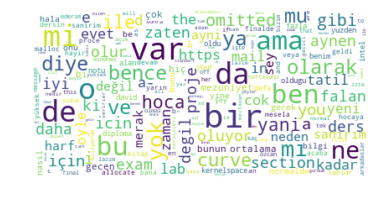

   bir    var      o     mi     da     de    ama    ben     bu     ne     mı    yok     ya   diye olarak 
    40     34     30     30     30     30     25     24     24     21     18     16     15     14     14 


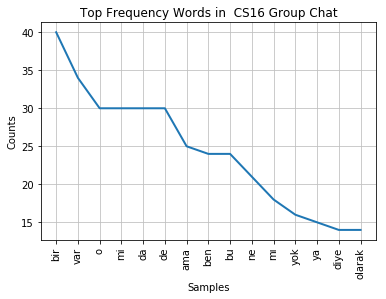

   bir    var     mi     da     de    ama    ben     bu     ne     mı    yok     ya   diye olarak  bence 
    40     34     30     30     30     25     24     24     21     18     16     15     14     14     14 


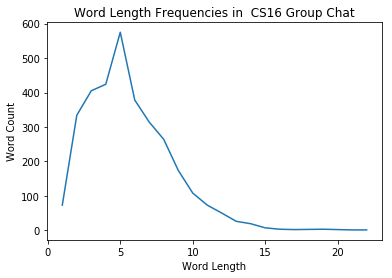

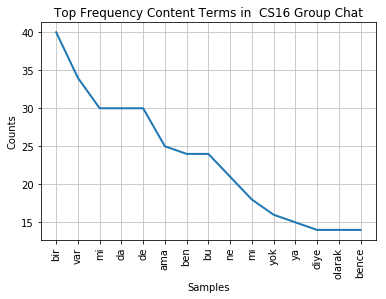

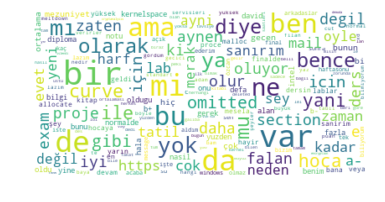

In [5]:
chatStr = ""
for msg in messages:
    chatStr += msg.text + " \n "
word_analyze(chatStr, " CS16 Group Chat")

# Reminder: stopwords are currently in english.